In [29]:
# %matplotlib inline
import sys
sys.path.append('../../utils')
import utils as u
import math

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
import numpy as np

from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import MultipleLocator
from random import randint
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.backends.backend_pdf import PdfPages

from palettable.colorbrewer.sequential import YlGnBu_5


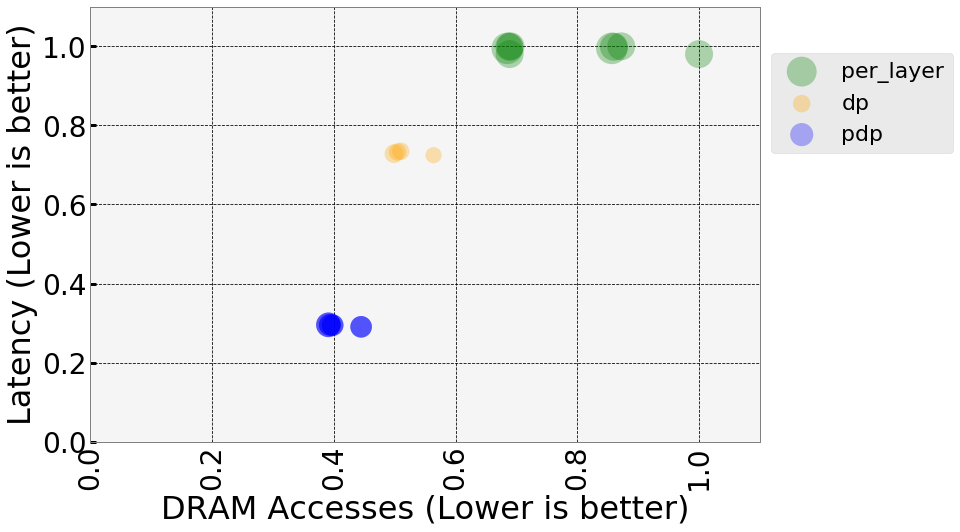

In [102]:
# Plot type
plt.style.use('ggplot')

#Loading data
df = pd.read_csv('../../data/bricks/mobilenet_v2_latency.csv')

df['total_mac_cycles'] = df['total_mac_cycles'] / df['total_mac_cycles'].max()
df['total_dma_accesses'] = df['total_dma_accesses'] / df['total_dma_accesses'].max()
df['total_memory_mb'] = df['total_memory_mb'] / df['total_memory_mb'].max()
df['total_memory_mb'] = [math.pow(x,6) for x in df['total_memory_mb']]


fig, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation=90)


# plt.xlim(-0.5, 10)

N = len(df['name'])
ind = np.arange(N)
# width = 0.8

df_sorted = df.sort_values(by=['total_dma_accesses'])


majorLocator = MultipleLocator(0.2)
minorLocator = MultipleLocator(0.2)
# majorFormatter = FormatStrFormatter('%d')
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_minor_locator(minorLocator)
# ax.xaxis.set_major_formatter(majorFormatter)


cl = {'pdp':'blue','dp':'orange','per_layer':'green'}


for sch in list(set(df_sorted['schedule_name'])):
    vals = df_sorted[df_sorted['schedule_name'] == sch]
    ax.scatter(vals['total_mac_cycles'], vals['total_dma_accesses'],
                s=vals['total_memory_mb']*1000, marker = 'o', color=cl[sch],label=sch,
              alpha=0.3, edgecolors='none')

# for n in np.arange(len(df['name'])):
#     ax.text(df['Area'][n]-0.06, df['Power'][n]-0.07, df['name'][n], fontsize=16)

# Put limit on Y axis
plt.ylim(0, 1.1)
plt.xlim(0, 1.1)

# Set X label values
ax.set_ylabel('Latency (Lower is better)',fontsize=32, color='black')
ax.set_xlabel('DRAM Accesses (Lower is better)',fontsize=32, color='black')

# ax.set_xticks(ind+0.8);

# Put the labels from 'app' coulmn
# ax.set_xticklabels(u.rename(df['name']))
ax.set_facecolor('whitesmoke')

plt.gca().xaxis.grid(True, color='black')
plt.gca().yaxis.grid(True, color='black')

plt.tick_params( axis='x', which='both', bottom=False, top=False, colors='black')
plt.tick_params( axis='y', which='both', right=False, colors='black' )
plt.tick_params(axis='both', which='major', direction='in', 
                length=6, width=3,color='black', labelsize=28)
plt.grid(linestyle='--')

# plt.legend(numpoints=1)
plt.legend(bbox_to_anchor=(1, 0.92), fontsize=22)



ax.spines['bottom'].set_color('gray')
ax.spines['top'].set_color('gray')
ax.spines['right'].set_color('gray')
ax.spines['left'].set_color('gray')

# Saving the plot
# fig.savefig('test.pdf',facecolor=fig.get_facecolor(), bbox_inches='tight')